In [1]:
import numpy as np
import pandas as pd
import os
import csv
import math
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta
%matplotlib inline
import plotly as py
import plotly.figure_factory as ff


In [18]:
curr_dir = os.getcwd()# tells where your running code
P_folders = [name for name in os.listdir() if name.startswith('P') and os.path.isdir(name)] #getting dirextroies

for P_folder in P_folders:
    print(os.path.join(curr_dir, P_folder))

/Users/stefanycruz/Desktop/Pilot_raw/P4
/Users/stefanycruz/Desktop/Pilot_raw/P3
/Users/stefanycruz/Desktop/Pilot_raw/P2
/Users/stefanycruz/Desktop/Pilot_raw/P0
/Users/stefanycruz/Desktop/Pilot_raw/P1


In [2]:
file_name = "P0.csv"
df = pd.read_csv(file_name,sep=',', skiprows=5, header=1)
start_dt = df.at[0, 'StartTime']
start_dt = dt.datetime.strptime(start_dt, "%m/%d/%y %H:%M")

df = pd.read_csv(file_name,sep=',', skiprows=9, header=1)
df.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

df.head()

,CigIndex,PuffIndex,Volume(ml),Duration(ms),AvgFlow(ml/sec),PeakFlow(ml/sec),TimeOfPeak(ms),IPI(ms)
0,41,1,211.2,2837,75.3,121.2,2135,7438
1,41,2,164.4,2981,56.2,69.9,1490,10471
2,41,3,288.6,4253,69.6,105.2,1855,10696
3,41,4,196.4,2612,76.6,106.2,2160,11804
4,41,5,253.9,3905,66.7,99.6,3335,20939


In [3]:
def create_gantt_df(df):
    gantt_df=pd.DataFrame()
    gantt_df['Start'] = df['starttime abs'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))
    gantt_df['Finish'] = df['endtime abs'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))
    gantt_df['Resource'] = 'CressPocket' # color of the task
    gantt_df['Task'] = 'CressPocket'# grouping for row
    gantt_df['Description'] = df['Duration(ms)'].astype(str) + ' ms'
    
    return(gantt_df)

In [4]:
df['IPI + Duration'] = df.apply(lambda col: col['IPI(ms)'] + col['Duration(ms)'], axis=1)
df['endtime rel'] = df['IPI + Duration'].cumsum()
df['starttime rel'] = df['endtime rel'] - df['Duration(ms)']

df['starttime abs'] = df['starttime rel'].apply(lambda x: start_dt + dt.timedelta(milliseconds=x))
df['endtime abs'] = df['endtime rel'].apply(lambda x: start_dt + dt.timedelta(milliseconds=x))
gantt_df = create_gantt_df(df)

In [5]:
df

,CigIndex,PuffIndex,Volume(ml),Duration(ms),AvgFlow(ml/sec),PeakFlow(ml/sec),TimeOfPeak(ms),IPI(ms),IPI + Duration,endtime rel,starttime rel,starttime abs,endtime abs
0,41,1,211.2,2837,75.3,121.2,2135,7438,10275.0,10275.0,7438.0,2020-02-27 17:47:07.438,2020-02-27 17:47:10.275
1,41,2,164.4,2981,56.2,69.9,1490,10471,13452.0,23727.0,20746.0,2020-02-27 17:47:20.746,2020-02-27 17:47:23.727
2,41,3,288.6,4253,69.6,105.2,1855,10696,14949.0,38676.0,34423.0,2020-02-27 17:47:34.423,2020-02-27 17:47:38.676
3,41,4,196.4,2612,76.6,106.2,2160,11804,14416.0,53092.0,50480.0,2020-02-27 17:47:50.480,2020-02-27 17:47:53.092
4,41,5,253.9,3905,66.7,99.6,3335,20939,24844.0,77936.0,74031.0,2020-02-27 17:48:14.031,2020-02-27 17:48:17.936
5,41,6,188.8,2591,74.2,111.5,540,22604,25195.0,103131.0,100540.0,2020-02-27 17:48:40.540,2020-02-27 17:48:43.131
6,41,7,171.1,2572,68.3,90.3,1980,14862,17434.0,120565.0,117993.0,2020-02-27 17:48:57.993,2020-02-27 17:49:00.565
7,41,8,117.2,2385,50.0,65.9,805,22397,24782.0,145347.0,142962.0,2020-02-27 17:49:22.962,2020-02-27 17:49:25.347
8,41,9,137.4,1873,76.1,106.4,350,15479,17352.0,162699.0,160826.0,2020-02-27 17:49:40.826,2020-02-27 17:49:42.699
9,41,10,123.0,2057,61.3,84.9,245,24061,26118.0,188817.0,186760.0,2020-02-27 17:50:06.760,2020-02-27 17:50:08.817


In [6]:
st = df['starttime rel'].tolist()
length = df['Duration(ms)']

graph = list(zip(st, length))

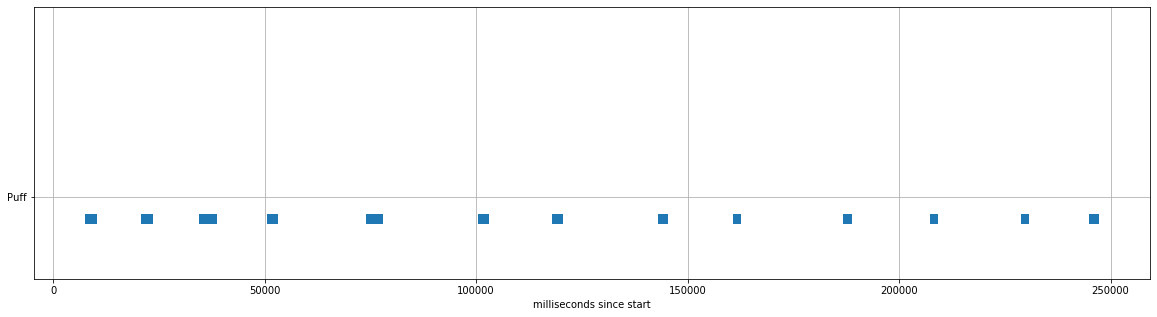

In [7]:

  
# Declaring a figure "gnt" 
fig, gnt = plt.subplots(figsize=(20, 5)) 

  
# # Setting Y-axis limits 
gnt.set_ylim(0, 50) 
  
# # Setting X-axis limits 
# gnt.set_xlim(0, 160) 
  
# Setting labels for x-axis and y-axis 
gnt.set_xlabel('milliseconds since start') 
gnt.set_ylabel('') 
  
# Setting ticks on y-axis 
gnt.set_yticks([15]) 
# Labelling tickes of y-axis 
gnt.set_yticklabels(['Puff']) 
  
# Setting graph attribute 
gnt.grid(True) 
  
# Declaring a bar in schedule 

  
# Declaring multiple bars in at same level and same width 
gnt.broken_barh(graph, (10, 2), facecolors ='tab:blue') 
  

  
plt.savefig("gantt1.png") 


In [8]:
def gantt_plot(gantt_df):
    '''The columns in the dataframe provided to the plotly gantt chart function
    must include the following keys: Task, Start, Finish'''

    colors = dict(CressPocket='rgb(120, 183, 178)')

    fig = ff.create_gantt(gantt_df,
                          colors=colors,
                          index_col='Resource',
                          title='P0 Puffs',
                          show_colorbar=True,
                          bar_width=0.2,
                          showgrid_x=True,
                          showgrid_y=True,
                          group_tasks=True)

    return fig


In [9]:
fig = gantt_plot(gantt_df)
py.offline.plot(fig, filename='P0 Puffs.html')

'P0 Puffs.html'